<a href="https://colab.research.google.com/github/vigneshjayanth00/Football/blob/master/Liv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import json
import glob
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize 
import fns1
from tqdm import tqdm


In [0]:

def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

In [0]:

# loop through each JSON file parse the data and save the parse data to CSV- events
    with open(r'C:\Users\Home\Documents\Statsbomb\Statsbomb Data\PL19_20\PL19_20EventsJSON.json', encoding='utf-8-sig') as f_input:
        events = pd.read_json(f_input)
# loop through each JSON file parse the data and save the parse data to CSV- lineups
    with open(r'C:\Users\Home\Documents\Statsbomb\Statsbomb Data\PL19_20\PL19_20LineupsJSON.json', encoding='utf-8-sig') as f_input:
        lineups = pd.read_json(f_input)
# loop through each JSON file parse the data and save the parse data to CSV-matches
    with open(r'C:\Users\Home\Documents\Statsbomb\Statsbomb Data\PL19_20\PL19_20matchesJSON.json', encoding='utf-8-sig') as f_input:
        matches = pd.read_json(f_input)


In [0]:
Start_events=[35,18]
events2 = events[~(events['type.id'].isin(Start_events))].reset_index(drop=True)

def action_locations(row):
    
    if row['pass.end_location'] != {}:
        return row['pass.end_location']
    if row['carry.end_location'] != {}:
        return row['carry.end_location']
    if row['shot.end_location'] != {}:
        return row['shot.end_location']
    return row['location']

events2['action_end_locations']=events2.apply(action_locations,axis=1).reset_index(drop=True)
events2[['action_end_x','action_end_y','action_end_z']]=events2['action_end_locations'].apply(pd.Series)
events2[['action_start_x','action_start_y']]=events2['location'].apply(pd.Series)



In [0]:
events2.to_csv(r'C:\Users\Home\Documents\StatsBomb_Sorted.csv')


In [0]:
events2['pass.end_location'].dtype

dtype('O')

In [0]:
Match_list=list(Liv['match_id'].unique())
matches1=matches[matches['match_id'].isin(Match_list)]
matches1

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition.competition_id,competition.country_name,...,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name
0,299532,2019-08-31,18:30:00.000,0,3,available,2019-12-16T23:09:16.168756,4,2,England,...,1,Regular Season,225.0,Turf Moor,68.0,England,18.0,C. Kavanagh,68.0,England
6,299690,2019-11-02,16:00:00.000,1,2,available,2019-12-16T23:09:16.168756,11,2,England,...,1,Regular Season,211.0,Villa Park,68.0,England,3.0,J. Moss,68.0,England
19,300139,2019-08-17,16:00:00.000,1,2,available,2019-12-16T23:09:16.168756,2,2,England,...,1,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,299527,2019-09-28,13:30:00.000,0,1,available,2019-12-16T23:09:16.168756,7,2,England,...,1,Regular Season,216.0,Bramall Lane,68.0,England,8.0,A. Taylor,68.0,England
33,299564,2019-10-20,17:30:00.000,1,1,available,2019-12-16T23:09:16.168756,9,2,England,...,1,Regular Season,2.0,Old Trafford,68.0,England,4.0,M. Atkinson,68.0,England
35,299583,2019-11-10,17:30:00.000,3,1,available,2019-12-16T23:09:16.168756,12,2,England,...,1,Regular Season,6.0,Anfield,68.0,England,1.0,M. Oliver,68.0,England
56,299813,2019-08-24,18:30:00.000,3,1,available,2019-12-16T23:09:16.168756,3,2,England,...,1,Regular Season,6.0,Anfield,68.0,England,8.0,A. Taylor,68.0,England
78,299502,2019-08-09,21:00:00.000,4,1,available,2019-12-16T23:09:16.168756,1,2,England,...,1,Regular Season,6.0,Anfield,68.0,England,1.0,M. Oliver,68.0,England
83,299591,2019-09-14,13:30:00.000,3,1,available,2019-12-16T23:09:16.168756,5,2,England,...,1,Regular Season,6.0,Anfield,68.0,England,5.0,A. Marriner,68.0,England
87,299546,2019-09-22,17:30:00.000,1,2,available,2019-12-16T23:09:16.168756,6,2,England,...,1,Regular Season,10.0,Stamford Bridge,68.0,England,1.0,M. Oliver,68.0,England


In [0]:
events2=pd.read_csv(r'C:\Users\Home\Documents\StatsBomb_Sorted.csv')


C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (117,124,130,132) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:


    #Assigning Proxy associated to x-axis (three Vertical zones)
    Liv = events2[(events2['team.name']=='Everton')].reset_index(drop=True)
    bins = [0,40,80,121]
    labels = ["Safe","Attack","Danger"]
    Liv['x_zone']= pd.cut(Liv['action_start_x'], bins=bins, labels=labels)

    bins1 = [0,11,22,55,70,120]
    labels1 = ["Right","Right-Half-Space","Middle","Left-Half-Space","Left"]
    Liv['y_zone']= pd.cut(Liv['action_start_y'], bins=bins1, labels=labels1)

    
Liv['player.name'].unique()

array(['Dominic Calvert-Lewin', 'Michael Keane',
       'Bernard Anício Caldeira Duarte', 'Gylfi Þór Sigurðsson',
       'Lucas Digne', 'Morgan Schneiderlin', 'Richarlison de Andrade',
       'Séamus Coleman', 'André Filipe Tavares Gomes',
       'Yerry Fernando Mina González', nan, 'Jordan Pickford',
       'Alex Iwobi', 'Moise Bioty Kean', 'Theo Walcott', 'Fabian Delph',
       'Cenk Tosun', 'Tom Davies', 'Djibril Sidibé', 'Mason Holgate',
       'Jean-Philippe Gbamin'], dtype=object)

In [0]:
Liv['Half']=np.where(Liv['action_start_x']>60,'Attacking Half','Defensive Half')


In [0]:
#Final Third Entries
Liv['Final_third_entry']=np.where((Liv['x_zone']=='Danger') & (Liv['x_zone'].shift(1)=='Attack') & (Liv['x_zone'].shift(-1)=='Danger'), 1, 0)
Liv['matchid_possession']=Liv['match_id']+Liv['possession']

#Direction of passes
Liv['Forward_Pass'] = np.where((Liv['type.name']=='Pass') & (Liv['action_start_x'] < Liv['action_end_x']), 1, 0)
Liv['Defensive_Pass'] = np.where((Liv['type.name']=='Pass') & (Liv['action_start_x']> Liv['action_end_x']), 1, 0)
Liv['Sideway_Pass'] = np.where((Liv['type.name']=='Pass') & (Liv['action_start_x']== Liv['action_end_x']), 1, 0)

#First subset Liverpool possessions
Liv_poss=Liv[Liv['possession_team.name']=='Everton']

##Get all the possession chains where a shot occured
Liv_poss_shot_FE_Entry=Liv_poss[(Liv_poss['type.name']=='Shot')|(Liv_poss['Final_third_entry']==1)]
poss_shot=list(Liv_poss_shot_FE_Entry['matchid_possession'].unique())

#Subset all possessions where a shot occured
Liv_poss1=Liv_poss[Liv_poss['matchid_possession'].isin(poss_shot)]

#Get the outcome columns as one outcome column
outcome_name_cols =[x for x in Liv_poss1.columns[Liv_poss1.columns.str.contains('.outcome.name')]]



In [0]:
Liv_poss1[outcome_name_cols] = Liv_poss1[outcome_name_cols].fillna('')
Liv_poss1['outcome'] = Liv_poss1[outcome_name_cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)
Liv_poss1['outcome']=Liv_poss1['outcome'].replace(r'^\s*$','Unknown', regex=True)
Liv_poss1['outcome'].unique()

C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Home\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array(['Unknown', 'Incomplete', 'Blocked', 'Out', 'Complete', 'Won',
       'Claim', 'Off T', 'Wayward', 'Success In Play', 'Tactical', 'Post',
       'Goal', 'Success', 'Saved', 'Pass Offside', 'Lost In Play',
       'Lost Out', 'Injury Clearance', 'Collected Twice', 'Lost',
       'Success Out', 'No Touch', 'Saved Twice'], dtype=object)

In [0]:
e_types= ['Pass', 'Ball Receipt*', 'Carry', 'Dribble', 'Shot']
#Subset all possessions with certain attacking event types
Liv_poss2=Liv_poss1[Liv_poss1['type.name'].isin(e_types)].reset_index()
event_types=list(Liv_poss2['type.name'].unique())
event_types
possession=list(Liv_poss2['matchid_possession'].unique())

Liv_poss2['player.name'].unique()


array(['Dominic Calvert-Lewin', 'Richarlison de Andrade',
       'Morgan Schneiderlin', 'Bernard Anício Caldeira Duarte',
       'Lucas Digne', 'Yerry Fernando Mina González', 'Michael Keane',
       'Séamus Coleman', 'Gylfi Þór Sigurðsson',
       'André Filipe Tavares Gomes', 'Jordan Pickford', 'Alex Iwobi',
       'Moise Bioty Kean', 'Theo Walcott', 'Fabian Delph', 'Cenk Tosun',
       'Djibril Sidibé', 'Tom Davies', 'Mason Holgate',
       'Jean-Philippe Gbamin'], dtype=object)

In [0]:
#Liv_OP=Liv[~(Liv['possession_team.name']=='Liverpool')]
#Liv_OP.head(100)
Liv_poss3=Liv_poss2[['matchid_possession','player.name',"x_zone", 'Final_third_entry',"y_zone","action_start_x", 'team.name','outcome',"action_end_y", "action_end_x", "action_start_y",'type.name','possession_team.name']]
Liv_poss4=Liv_poss3.rename(columns={'action_start_x': 'start_x', 'action_start_y': 'start_y','action_end_x': 'end_x', 'action_end_y': 'end_y','type.name':'actiontype','possession_team.name':'team_name'})
Liv_poss4['matchid_possession'].unique()



array([299534, 299539, 299540, 299544, 299546, 299548, 299549, 299551,
       299553, 299556, 299557, 299560, 299567, 299569, 299572, 299579,
       299581, 299585, 299588, 299589, 299594, 299595, 299597, 299599,
       299601, 299607, 299609, 299611, 299615, 299619, 299621, 299622,
       299626, 299627, 299630, 299633, 299636, 299637, 299641, 299642,
       299643, 299646, 299650, 299657, 299658, 299659, 299661, 299662,
       299664, 299665, 299666, 299669, 299671, 299672, 299674, 299679,
       299680, 299682, 299683, 299684, 299688, 299691, 299693, 299694,
       299697, 299698, 299700, 299702, 299706, 299707, 299709, 299771,
       299777, 299779, 299780, 299783, 299786, 299788, 299791, 299792,
       299796, 299797, 299800, 299802, 299805, 299806, 299811, 299812,
       299813, 299815, 299816, 299817, 299818, 299819, 299820, 299824,
       299827, 299828, 299829, 299835, 299836, 299837, 299844, 299848,
       299850, 299852, 299856, 299857, 299859, 299860, 299862, 299864,
      

In [0]:
Liv_poss4['Final_third_entry1']=Liv_poss4['Final_third_entry'].shift(-1)
Liv_poss4['Final_third_entry2']=Liv_poss4['Final_third_entry'].shift(-2)
Liv_poss4['Final_third_entry3']=Liv_poss4['Final_third_entry'].shift(-3)
Liv_poss4['Final_third_entry4']=Liv_poss4['Final_third_entry'].shift(-4)
Liv_poss4['Final_third_entry5']=Liv_poss4['Final_third_entry'].shift(-5)
Liv_poss4['Final_third_entry_final']=Liv_poss4['Final_third_entry']+Liv_poss4['Final_third_entry1']+Liv_poss4['Final_third_entry2']+Liv_poss4['Final_third_entry3']+Liv_poss4['Final_third_entry4']+Liv_poss4['Final_third_entry5']
Liv_poss4=Liv_poss4.reset_index()

In [0]:
import matplotsoccer1

import plotsoccer2
import math
#Liv_poss_check2=Liv_poss4[(Liv_poss4['matchid_possession']==299852) & (Liv_poss4['Final_third_entry_final']==1)]

#Liv_poss_check2=Liv_poss_check1.iloc[:8,:]
Liv_poss_shot=Liv_poss4[(Liv_poss4['actiontype']=='Shot')]
Liv_poss_shot['matchid_possession'].unique()


array([299548, 299549, 299588, 299607, 299621, 299643, 299665, 299672,
       299684, 299694, 299702, 299707, 299777, 299780, 299792, 299797,
       299837, 299879, 299909, 299926, 299927, 299934, 299936, 299943,
       299944, 299954, 299677, 299687, 299689, 299698, 299721, 299723,
       299743, 299747, 299748, 299772, 299781, 299809, 299839, 299719,
       299740, 299755, 299758, 299766, 299803, 299850, 299873, 299880,
       299889, 299915, 299925, 299935, 299945, 300120, 300121, 300132,
       300142, 300146, 300168, 300175, 300177, 300179, 300220, 300221,
       300225, 300235, 300259, 300261, 300263, 300268, 300269, 300274,
       300280, 300114, 300143, 300187, 300224, 300242, 300256, 300137,
       300145, 300147, 300149, 300181, 300208, 300253, 300284, 300296,
       300308, 300320, 299688, 299713, 299718, 299720, 299760, 299775,
       299782, 299783, 299847, 299865, 299871, 299695, 299716, 299756,
       299765, 299790, 299796, 299829, 299833, 299836, 299703, 299728,
      

In [0]:
Liv_poss_check2=Liv_poss4[Liv_poss4['matchid_possession']==299916]
Liv_poss_check2=Liv_poss_check2[Liv_poss_check2['actiontype']!='Ball Receipt*']
#Liv_poss_check2=Liv_poss_check2.iloc[:8,:]


In [0]:
#Converting into SPADL format

field_length: float = 105.0  # unit: meters
field_width: float = 68.0  # unit: meters
    
Liv_poss_check2["start_x"] = ((Liv_poss_check2["start_x"] - 1) / 119) * field_length
Liv_poss_check2["start_y"] = 68 - ((Liv_poss_check2["start_y"] - 1) / 79) * field_width

Liv_poss_check2["end_x"] = ((Liv_poss_check2["end_x"] - 1) / 119) * field_length
Liv_poss_check2["end_y"] = 68 - ((Liv_poss_check2["end_y"] - 1) / 79) * field_width

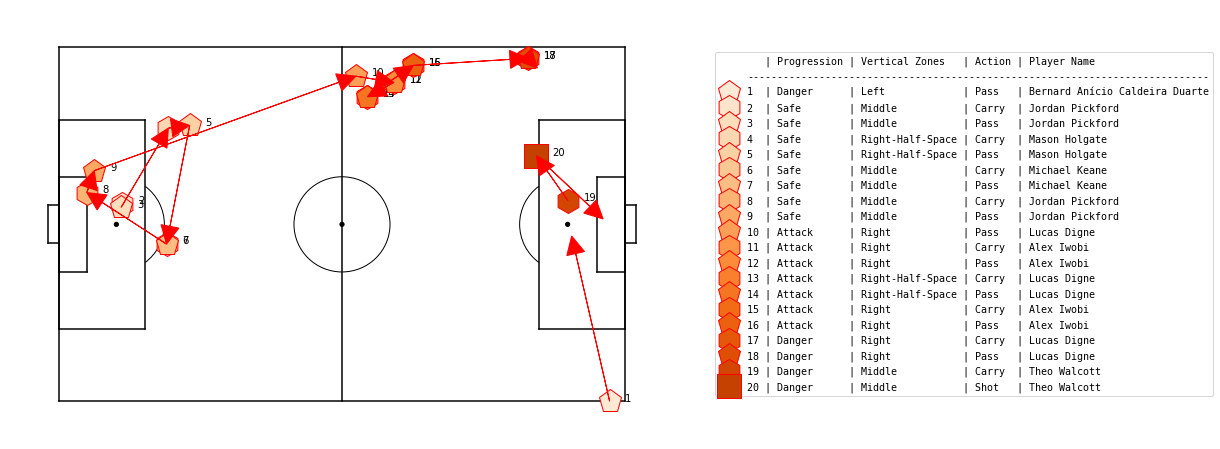

In [0]:
fns1.actions(
    location=Liv_poss_check2[["start_x", "start_y", "end_x", "end_y"]],
    action_type=Liv_poss_check2.actiontype,
    team=Liv_poss_check2.team_name,
    color="white",
    figsize=12,
    result= Liv_poss_check2.outcome == "",
    label=Liv_poss_check2[["x_zone", "y_zone",'actiontype','player.name']],
    labeltitle=["Progression","Vertical Zones",'Action','Player Name'],
    zoom=False
)



